In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('datamining.csv')

In [ ]:
data.head()

,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,易,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-8373966078912715601,8154604467375388289
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,中,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3516683932418412104,3762301478342295221
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,難,人物,連續,112,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,4652807748946159405
3,5,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）,中,生活知識,非連續,112,112-2,Mon May 13 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-6293485111595748020,240621445882253268
4,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4998280410504838977,-3340858198738005072


In [ ]:
df = pd.DataFrame(data)

In [ ]:
labels = status_counts.index
print(labels)

Index(['已派發任務', '完成任務', '暫停任務', '進行任務中', '取消派發'], dtype='object', name='mission_status')


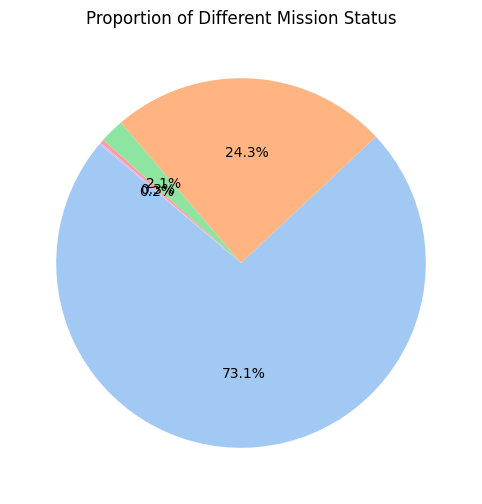

mission_status
已派發任務    730878
完成任務     243026
暫停任務      21103
進行任務中      3300
取消派發       1692
Name: count, dtype: int64


In [ ]:
# 計算每個 mission_status 的數量
status_counts = data['mission_status'].value_counts()

# 取得 mission_status 狀態的名稱
labels = status_counts.index.tolist()

# 計算每個 status 的比例
sizes = status_counts.values
colors = sns.color_palette('pastel', len(labels))

# 繪製圓餅圖
plt.figure(figsize=(8, 6))  # 設定圖表尺寸為 8x6 英寸
wedges, texts, autotexts = plt.pie(
    sizes,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140
)

# 添加標題
plt.title('Proportion of Different Mission Status')

# 顯示圖表
plt.show()

# 顯示不同 mission_status 的統計數據
print(status_counts)

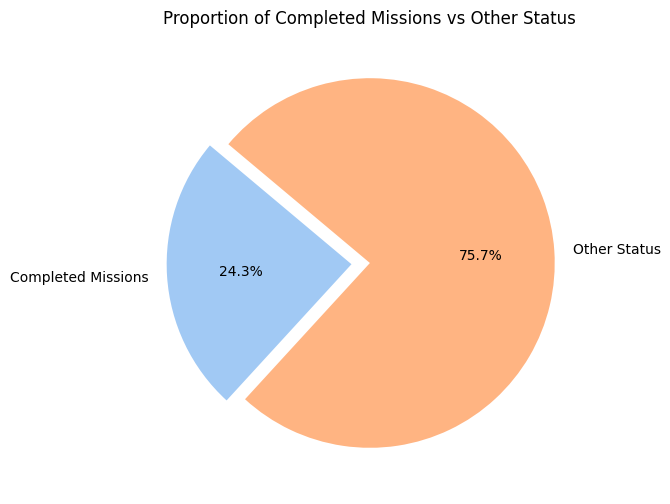

完成任務比數：243026
平台上完成任務的真正使用者數量為：8143


In [ ]:
completed_missions = data[data['mission_status'] == '完成任務']
completed_missions_count = completed_missions.shape[0]


# 找出不重複的 user_id
unique_users = completed_missions['user_id'].drop_duplicates()
unique_user_count = unique_users.nunique()

# 計算其他狀態的比數
other_missions_count = data.shape[0] - completed_missions_count


# 整理數據
labels = ['Completed Missions', 'Other Status']
sizes = [completed_missions_count, other_missions_count]
colors = sns.color_palette('pastel')[:2]

# 繪製圓餅圖
plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=(0.1, 0)  # 突出完成任務部分
)
plt.title('Proportion of Completed Missions vs Other Status')
plt.show()

# 顯示計算結果
print(f'完成任務比數：{completed_missions_count}')
print(f'平台上完成任務的真正使用者數量為：{unique_user_count}')

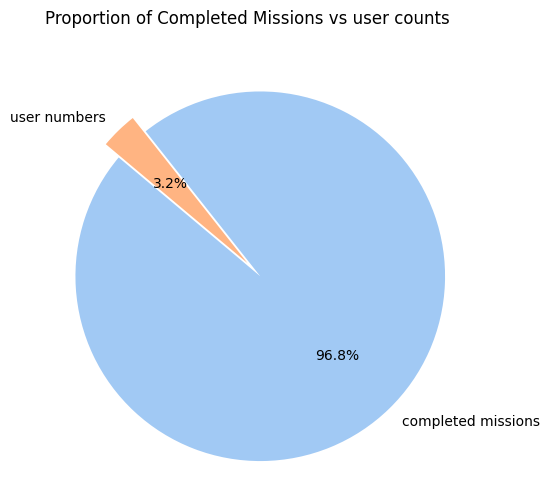

In [ ]:
# 整理數據
labels = ['completed missions', 'user numbers']
sizes = [completed_missions_count,unique_user_count]
colors = sns.color_palette('pastel')[:2]

# 繪製圓餅圖
plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=(0.1, 0)  # 突出完成任務部分
)
plt.title('Proportion of Completed Missions vs user counts')
plt.show()

完成任務次數最多的使用者有以下幾位：
user_id
2946013123453546789    295
Name: count, dtype: int64


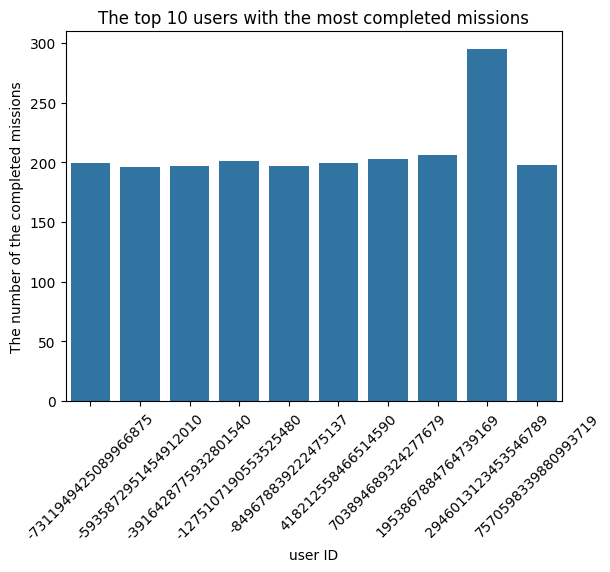

In [ ]:
# 計算每個 user_id 的完成次數
user_completion_counts = completed_missions['user_id'].value_counts()
# 找到完成次數的最大值
max_completion_count = user_completion_counts.max()
top_users = user_completion_counts[user_completion_counts == max_completion_count]

print(f"完成任務次數最多的使用者有以下幾位：")
print(top_users)

# 視覺化顯示前幾位完成任務次數的使用者
top_users_plot = user_completion_counts.head(10)
sns.barplot(x=top_users_plot.index, y=top_users_plot.values)
plt.title('The top 10 users with the most completed missions')
plt.xlabel('user ID')
plt.ylabel('The number of the completed missions')
plt.xticks(rotation=45)
plt.show()

前 100 名完成最多任務的使用者及其完成次數如下：
user_id
 2946013123453546789    295
 1953867884764739169    206
 703894689324277679     203
-1275107190553525480    201
 418212558466514590     199
                       ... 
-7137623346213111344    159
-5399232660601788920    158
-5212899996203578457    158
-7178818053211523277    158
 5516103338613029442    158
Name: count, Length: 100, dtype: int64


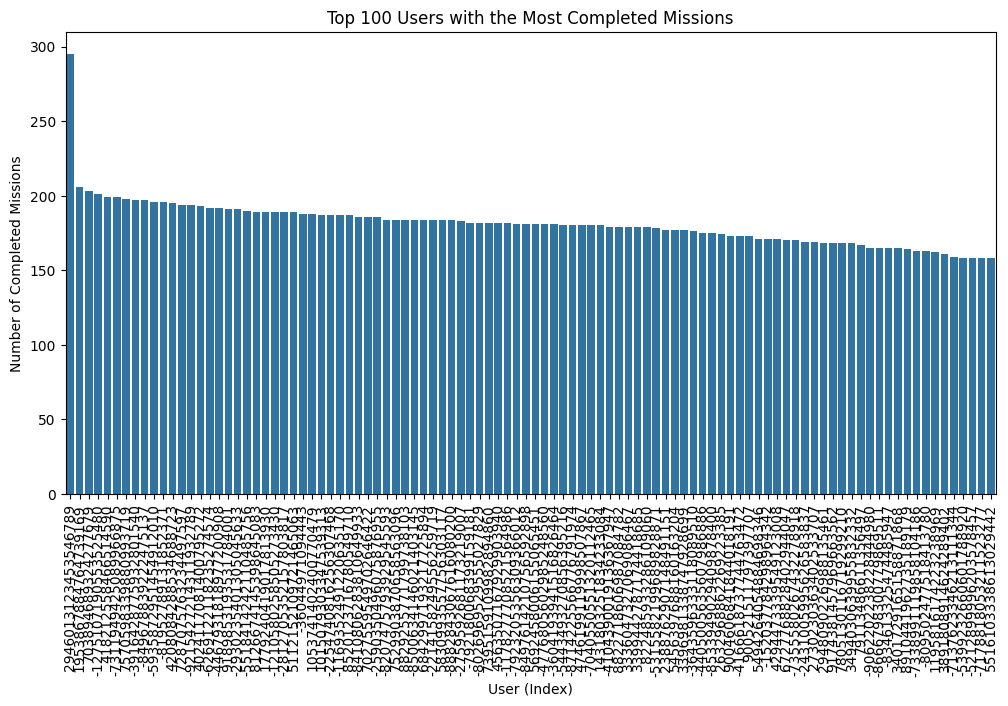

In [ ]:
# 計算每個 user_id 的完成次數
user_completion_counts = completed_missions['user_id'].value_counts()

# 取得前 100 名完成最多任務的使用者
top_100_users = user_completion_counts.head(100)

# 顯示前 100 名使用者的完成次數
print(f"前 100 名完成最多任務的使用者及其完成次數如下：")
print(top_100_users)

# 視覺化顯示前 100 名完成任務次數的使用者
plt.figure(figsize=(12, 6))
sns.barplot(x=top_100_users.index.astype(str), y=top_100_users.values)
plt.title('Top 100 Users with the Most Completed Missions')
plt.xlabel('User (Index)')
plt.ylabel('Number of Completed Missions')
plt.xticks(rotation=90)  # 避免 x 軸標籤擠在一起
plt.show()

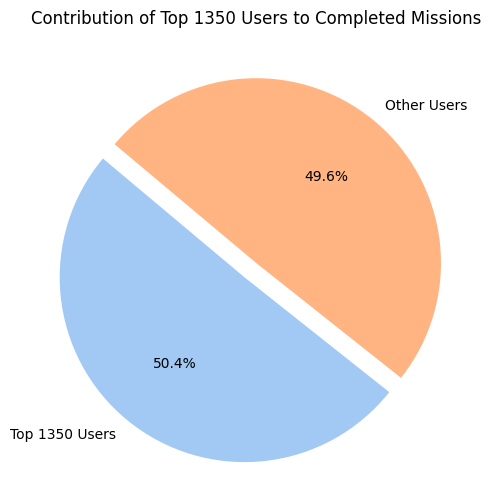

In [ ]:
# 計算每個 user_id 的完成次數
user_completion_counts = completed_missions['user_id'].value_counts()

# 設定要統計的前幾名使用者
top_n = 1350
top_users = user_completion_counts.head(top_n)

# 計算前幾名使用者的總完成次數
top_users_total = top_users.sum()

# 計算其餘使用者的總完成次數
other_users_total = user_completion_counts.sum() - top_users_total

# 計算比例
top_users_percentage = (top_users_total / user_completion_counts.sum()) * 100
other_users_percentage = 100 - top_users_percentage

# 繪製圓餅圖
labels = [f'Top {top_n} Users', 'Other Users']
sizes = [top_users_percentage, other_users_percentage]
colors = sns.color_palette('pastel')[:2]

plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=(0.1, 0)  # 突出 Top Users 部分
)
plt.title(f'Contribution of Top {top_n} Users to Completed Missions')
plt.show()

In [ ]:
df.isnull()
data_missing_value = df.isnull().sum()

print(data_missing_value)

In [ ]:
df = df[df['mission_status'] == '完成任務']
df.reset_index(drop=True, inplace=True)

df.head()

In [ ]:
# 先將難度映射成數字
difficulty_mapping = {
    '易': 1,
    '中': 2,
    '難': 3
}

df['difficulty_numeric'] = df['mission_difficulty'].map(difficulty_mapping)

# 按年級和題型的難度分組，計算每個組別的平均答對率
grouped = df.groupby(['grade', 'difficulty_numeric']).agg(
    avg_correct_rate=('correct_rate', 'mean'),
    count=('mission_id', 'count')  # 題目的數量
).reset_index()

# 檢視結果
print(grouped)

In [ ]:
import plotly.express as px

# 篩選出四年級的數據
fourth_grade_data = grouped[grouped['grade'] == 4]
fig = px.scatter(fourth_grade_data,
                 x='mission_field',  # 領域作為橫軸
                 y='avg_correct_rate',  # 平均答對率作為縱軸
                 color='difficulty_numeric',  # 以難度區分顏色
                 size='avg_correct_rate',  # 點的大小由平均答對率決定
                 labels={
                     'avg_correct_rate': '平均答對率',
                     'mission_field': '領域',
                     'difficulty_numeric': '難度等級'
                 },
                 title='四年級在不同領域和難度下的平均答對率')

# 顯示圖表
fig.show()

In [ ]:
import plotly.express as px

# 篩選出五年級的數據
fifth_grade_data = grouped[grouped['grade'] == 5]
fig = px.scatter(fifth_grade_data,
                 x='mission_field',  # 領域作為橫軸
                 y='avg_correct_rate',  # 平均答對率作為縱軸
                 color='difficulty_numeric',  # 以難度區分顏色
                 size='avg_correct_rate',  # 點的大小由平均答對率決定
                 labels={
                     'avg_correct_rate': '平均答對率',
                     'mission_field': '領域',
                     'difficulty_numeric': '難度等級'
                 },
                 title='五年級在不同領域和難度下的平均答對率')

# 顯示圖表
fig.show()

In [ ]:
import plotly.express as px

# 篩選出五年級的數據
sixth_grade_data = grouped[grouped['grade'] == 6]
fig = px.scatter(sixth_grade_data,
                 x='mission_field',  # 領域作為橫軸
                 y='avg_correct_rate',  # 平均答對率作為縱軸
                 color='difficulty_numeric',  # 以難度區分顏色
                 size='avg_correct_rate',  # 點的大小由平均答對率決定
                 labels={
                     'avg_correct_rate': '平均答對率',
                     'mission_field': '領域',
                     'difficulty_numeric': '難度等級'
                 },
                 title='六年級在不同領域和難度下的平均答對率')

# 顯示圖表
fig.show()

In [ ]:
import plotly.express as px

# 篩選出五年級的數據
seventh_grade_data = grouped[grouped['grade'] == 7]
fig = px.scatter(seventh_grade_data,
                 x='mission_field',  # 領域作為橫軸
                 y='avg_correct_rate',  # 平均答對率作為縱軸
                 color='difficulty_numeric',  # 以難度區分顏色
                 size='avg_correct_rate',  # 點的大小由平均答對率決定
                 labels={
                     'avg_correct_rate': '平均答對率',
                     'mission_field': '領域',
                     'difficulty_numeric': '難度等級'
                 },
                 title='七年級在不同領域和難度下的平均答對率')

# 顯示圖表
fig.show()

In [ ]:
import plotly.express as px

# 篩選出五年級的數據
eighth_grade_data = grouped[grouped['grade'] == 8]
fig = px.scatter(eighth_grade_data,
                 x='mission_field',  # 領域作為橫軸
                 y='avg_correct_rate',  # 平均答對率作為縱軸
                 color='difficulty_numeric',  # 以難度區分顏色
                 size='avg_correct_rate',  # 點的大小由平均答對率決定
                 labels={
                     'avg_correct_rate': '平均答對率',
                     'mission_field': '領域',
                     'difficulty_numeric': '難度等級'
                 },
                 title='八年級在不同領域和難度下的平均答對率')

# 顯示圖表
fig.show()

In [ ]:
import plotly.express as px

# 篩選出九年級的數據
ninth_grade_data = grouped[grouped['grade'] == 9]
fig = px.scatter(ninth_grade_data,
                 x='mission_field',  # 領域作為橫軸
                 y='avg_correct_rate',  # 平均答對率作為縱軸
                 color='difficulty_numeric',  # 以難度區分顏色
                 size='avg_correct_rate',  # 點的大小由平均答對率決定
                 labels={
                     'avg_correct_rate': '平均答對率',
                     'mission_field': '領域',
                     'difficulty_numeric': '難度等級'
                 },
                 title='九年級在不同領域和難度下的平均答對率')

# 顯示圖表
fig.show()

In [ ]:
print(df[['mission_difficulty', 'correct_rate']].head())

# 計算每個難度的平均答對率
difficulty_accuracy = df.groupby('mission_difficulty')['correct_rate'].mean()

# 顯示各難度的平均答對率
print(difficulty_accuracy)

In [ ]:
import plotly.express as px

# 將結果轉換為 DataFrame，方便可視化
difficulty_accuracy_df = difficulty_accuracy.reset_index()

# 繪製柱狀圖
fig = px.bar(difficulty_accuracy_df, x='mission_difficulty', y='correct_rate',
             title='不同難度的平均答對率', labels={'accuracy_rate': '平均答對率', 'mission_difficulty': '難度'})

# 顯示圖表
fig.show()

In [ ]:
difficulty_mapping = {
    '易': 1,
    '中': 2,
    '難': 3
}

# 將難度轉換成數字
df['difficulty_numeric'] = df['mission_difficulty'].map(difficulty_mapping)

# 按難度計算平均答對率
difficulty_accuracy = df.groupby('difficulty_numeric')['correct_rate'].mean()

# 顯示各難度的平均答對率
print(difficulty_accuracy)

In [ ]:
import plotly.express as px

# 將結果轉換為 DataFrame，方便可視化
difficulty_accuracy_df = difficulty_accuracy.reset_index()

# 繪製柱狀圖
fig = px.bar(difficulty_accuracy_df, x='difficulty_numeric', y='correct_rate',
             title='不同數字化難度的平均答對率',
             labels={'difficulty_numeric': '數字化難度', 'correct_rate': '平均答對率'},
             text='correct_rate')  # 在每個柱狀圖上顯示正確率數值

# 顯示圖表
fig.show()